Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_4              │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d_4[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_5              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_5[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,337,479 (27.99 MB)

 Trainable params: 941,383 (3.59 MB)

 Non-trainable params: 6,396,096 (24.40 MB)

🔹 Processing: akiec


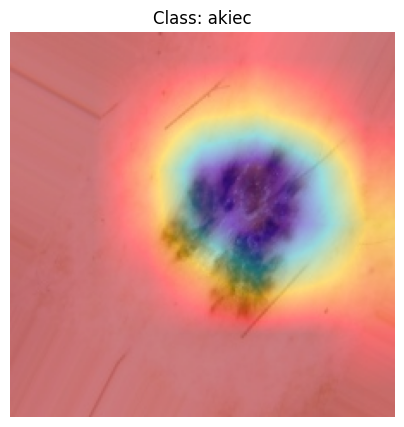

🔹 Processing: bcc


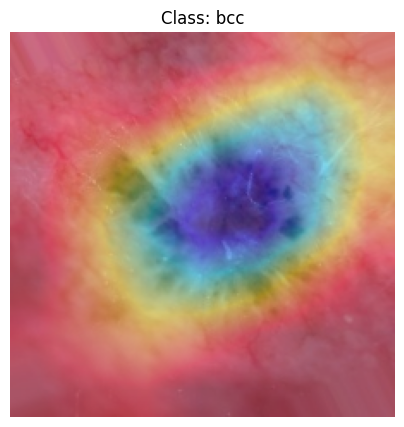

🔹 Processing: bkl


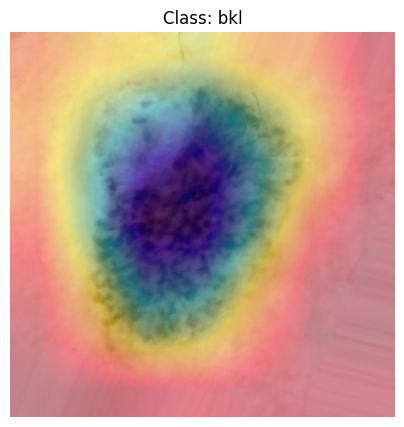

🔹 Processing: df


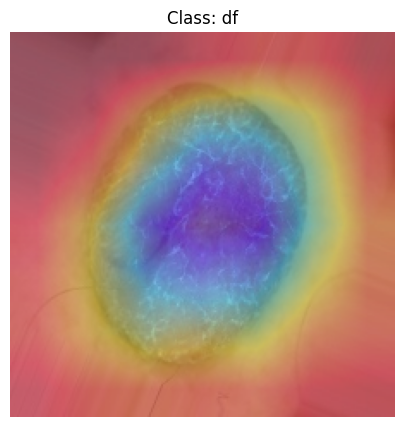

🔹 Processing: mel


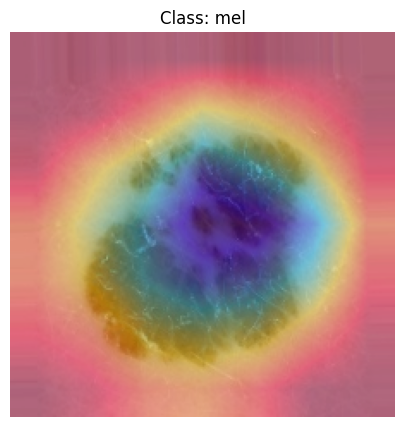

🔹 Processing: nv


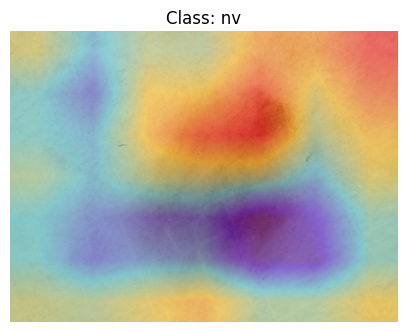

🔹 Processing: vasc


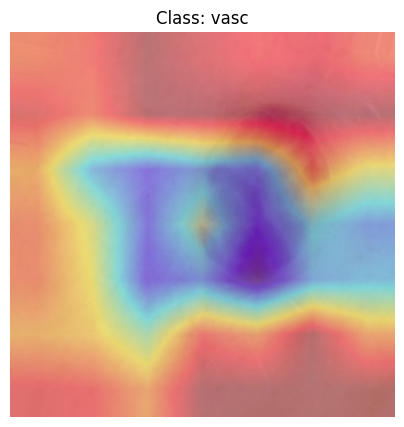


✅ All Grad-CAM outputs saved in: E:/Environment/HAM_10000_skin/GradCAM_Output


In [9]:
import tensorflow as tf
import numpy as np
import os, cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# ========================================
# 1️⃣ Configuration
# ========================================
model_path = "E:/Environment/HAM_10000_skin/best_model.h5"   # your trained CNN + DenseNet121 model
input_dir = "E:/Environment/HAM_10000_skin/GradCAM_Input"   # folder where you paste images
output_dir = "E:/Environment/HAM_10000_skin/GradCAM_Output"
os.makedirs(output_dir, exist_ok=True)

# ========================================
# 2️⃣ Load Model
# ========================================
model = load_model(model_path, compile=False)
model.summary()

# DenseNet121 typical last conv layer
last_conv_layer_name = "conv5_block16_concat"
# Use model.summary() to confirm or adjust this name

# ========================================
# 3️⃣ Helper Functions
# ========================================
def get_img_array(img_path, size=(224,224)):
    img = image.load_img(img_path, target_size=size)
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, axis=0)
    return arr / 255.0

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy(), int(pred_index)

def overlay_heatmap(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    blended = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return blended

# ========================================
# 4️⃣ Process Each Image in Folder
# ========================================
for file in os.listdir(input_dir):
    if not file.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    img_path = os.path.join(input_dir, file)
    class_name = os.path.splitext(file)[0]  # filename without extension

    print(f"🔹 Processing: {class_name}")

    # Preprocess & Generate GradCAM
    img_array = get_img_array(img_path)
    heatmap, pred_idx = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Overlay heatmap
    gradcam_img = overlay_heatmap(img_path, heatmap)
    save_path = os.path.join(output_dir, f"{class_name}_GradCAM.jpg")
    cv2.imwrite(save_path, cv2.cvtColor(gradcam_img, cv2.COLOR_RGB2BGR))

    # Display result
    plt.figure(figsize=(5,5))
    plt.imshow(gradcam_img)
    plt.title(f"Class: {class_name}")
    plt.axis('off')
    plt.show()

print(f"\n✅ All Grad-CAM outputs saved in: {output_dir}")
